# Titanic Dataset Part 1 - Wrangling Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('titanic_train.csv')

In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Looks like there are 891 data entries, but Age only has 714. We could drop those 177 entries, or find a way to keep them. Let's find a way to keep them. 

In [4]:
print('There is a mean of {}, and a median of {}. Which would be the most appropriate for this dataset?'.format(
    data['Age'].mean(), data.Age.median()))

There is a mean of 29.69911764705882, and a median of 28.0. Which would be the most appropriate for this dataset?


### The mean is the average of all of the ages, and the median is the middle age if we put all of the ages in order. Because the median is lower than the mean, that tells me that there are more young people than old people. However, the two values are very close, so I think either one would be a good estimator. Let's go with the mean. 

In [5]:
data['Age'].fillna(data.Age.mean(), inplace=True) #inplace = True let's you fill the data inplace

### Now that we have dealt with the numeric varaibles, let's take a look at the categorical variables

In [6]:
data.info() #We can see that there are 5 object features, which means that they are most likely categorical. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
def describe_categorical(X):
    """
    This will create a table for looking at the categorical variables based on the dtype
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == 'object']].describe().to_html()))

In [8]:
describe_categorical(data)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"McDermott, Miss. Brigdet Delia",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


#### We can see that there are 2 missing data entries in Embarked, and 687 missing data entries in Cabin. We can also see that there are only 2 possible entries for Sex, which we would expect. 

In [9]:
'''Let's fill the missing cabin numbers with a 0, then we can create a binary yes/no 
         that tells us if the person was wealthy enough to have a cabin.'''
data['Cabin'] = data.Cabin.fillna(0) #Filling the missing data points with 0s
data['Cabin'] = data['Cabin'].apply(lambda x: 0 if x == 0 else 1) #switching the rest of the data points to a 1

In [10]:
'No we can do the same with Sex, just making one sex a 1 and the other a 0, we will make male 0 and female 1'
data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'female' else 0)

### Let's look at our dataset now. 

In [11]:
data.head(20) #We can see that Sex and Cabin are numbers instead of words and letters now. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,1,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,0,C


## The last thing that we can do is drop some variables that we don't think would be useful*, in this case that will be the remaining categorical variables. 

######  *These variables could be extremely useful, but for the purpose of this code we will drop them. A great practice problem would be figuring out how to use these variables in a meaningful way. 

In [12]:
data.drop(['Name', 'Ticket', 'PassengerId', 'Embarked'], axis=1, inplace=True)

In [13]:
data.head(20) 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,1
4,0,3,0,35.000000,0,0,8.0500,0
5,0,3,0,29.699118,0,0,8.4583,0
6,0,1,0,54.000000,0,0,51.8625,1
7,0,3,0,2.000000,3,1,21.0750,0
8,1,3,1,27.000000,0,2,11.1333,0
9,1,2,1,14.000000,1,0,30.0708,0


# Now we have all numerical features and we can start building a baseline model!!!

# Titanic Dataset Part 2 - Building a Simple Model

### We will  build a Logistic Regression Model as a baseline, and then build some more complex models and see if we can improve our accuracy. 

Logistic Regression is a way to create a decision boundary between two categories using a line that gives the probability of a data point being a certain category. Below is an image that shows this decision boundary.If the data point it on the left side of the decision boundary then there is a less than 50% probability that the data point it a 1 (in our example of the titanic dataset, a 1 means the person survived.) The right side of the decision boundary is just the opposite. 

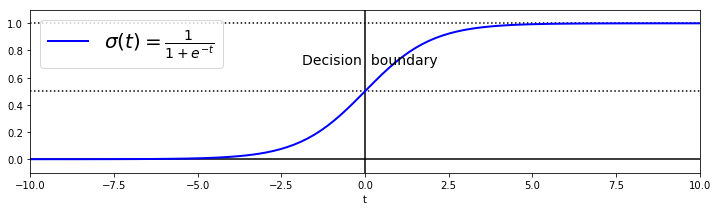

In [14]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(12, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.text(0.15, 0.7, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])

plt.show()

Now that we have an idea of how Logistic Regression is working, let's use it to make a prediction on our data. First we have to define our 'X' and 'y', then we have to split the data into a training set and a test set. The training set is the data that we will use to train our model (or let our model  'learn' on.) Then we will see how well our model generalizes to new data by using the test set (which is effectively data that the model has never seen before). 

In [15]:
X = data
y = X.pop('Survived') #This will remove Survived from X and use it for y

In [16]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,0


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
#test_size=0.2 will set aside 20% of our data for testing

##### Now we can build a Logistic Regression Model! 

In [20]:
from sklearn.linear_model import LogisticRegression #Importing the library

In [22]:
log_reg = LogisticRegression() #Instantiating the model

In [23]:
log_reg.fit(X_train, y_train) #Training the model on the training data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Our model is now trained, so we can use the score method on the test set and see how accurate it is. 

In [125]:
log_reg.score(X_test, y_test)

0.81005586592178769

Looks like our model has an 81% accuracy score. Not bad, but can we make it better? 

### Below is a fun plot showing the probability of surviving based on only the price of your ticket using Logistic Regression. Did Ticket Price make a difference?

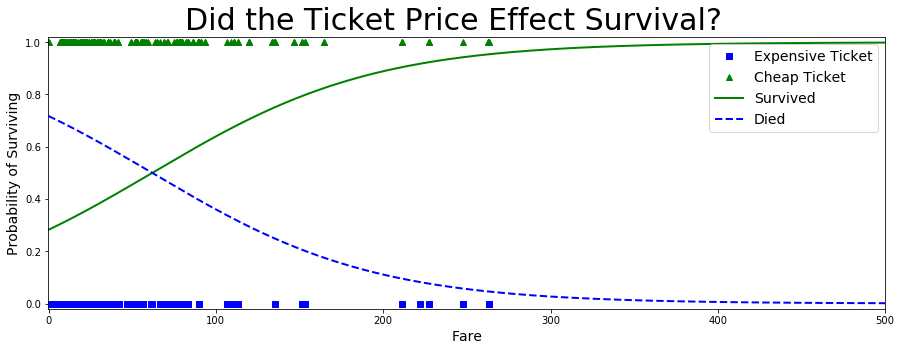

In [126]:
log_reg_1_feature = LogisticRegression().fit(X.Fare.reshape(-1,1), y)

X_new = np.linspace(0, 512, 1000).reshape(-1, 1)
y_proba = log_reg_1_feature.predict_proba(X_new)

plt.figure(figsize=(15, 5))
plt.plot(X.Fare.reshape(-1,1)[y==0], y[y==0], "bs", label='Expensive Ticket')
plt.plot(X.Fare.reshape(-1,1)[y==1], y[y==1], "g^", label='Cheap Ticket')

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Survived")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Died")

plt.xlabel("Fare", fontsize=14)
plt.ylabel("Probability of Surviving", fontsize=14)

plt.figtext(.5,.9,'Did the Ticket Price Effect Survival?', fontsize=30, ha='center')
plt.legend(loc="top right", fontsize=14)
plt.axis([-0.2, 500, -0.02, 1.02])

plt.show()